# Codes du test technique pour GAC Technology

## Imports

In [229]:
import matplotlib.pyplot as plt
import math
import numpy as np
import random
from keras import models, layers
import time

## Etape 1 : Visualisation du problème

In [230]:
# Fonction d'étude
def fonc(x):
    return 2*np.cos(x) + 4

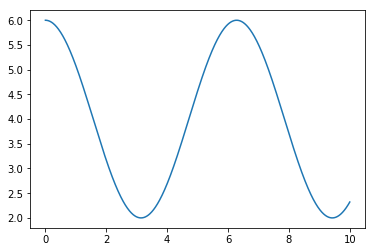

In [231]:
# Visualisation
x = np.linspace(0,10,1000)
plt.plot(x,fonc(x))

## Etape 2 : Définition des données 

In [232]:
# 1ère possibilité : les points sont choisis selon un intervalle précis
# In  : nbPoints    int, le nombre de points voulus
# Out : la liste des x et des y
def choix1(nbPoints):
    x = np.linspace(0,10,nbPoints)
    return x, fonc(x)

In [233]:
# 2ème possibilité : les points sont choisis aléatoirement
# In  : nbPoints    int, le nombre de points voulus
# Out : la liste des x et des y
def choix2(nbPoints) :
    x = [0]
    for i in range(nbPoints):
        x.append(10 * random.random())
    x.append(10)
    return x, fonc(x)

## Etape 3 : création du modèle

In [234]:
# Construction d'un modèle à deux niveaux
# In  : units     int,  le nombre d'units dans un layer
# Out : le modèle
def build_model_2l(units):
    model = models.Sequential()
    model.add(layers.Dense(units,activation = 'relu', input_shape = (1,)))
    model.add(layers.Dense(units,activation = 'relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer = 'rmsprop', loss= 'mse', metrics = ['mae'])
    return model

In [235]:
# Construction d'un modèle à trois niveaux
# In  : units     int,  le nombre d'units dans un layer
# Out : le modèle
def build_model_3l(units):
    model = models.Sequential()
    model.add(layers.Dense(units,activation = 'relu', input_shape = (1,)))
    model.add(layers.Dense(units,activation = 'relu'))
    model.add(layers.Dense(int(units/2),activation = 'relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer = 'rmsprop', loss= 'mse', metrics = ['mae'])
    return model

In [236]:
# Construction d'un modèle à quatre niveaux
# In  : units     int,  le nombre d'units dans un layer
# Out : le modèle
def build_model_4l(units):
    model = models.Sequential()
    model.add(layers.Dense(units,activation = 'relu', input_shape = (1,)))
    model.add(layers.Dense(units,activation = 'relu'))
    model.add(layers.Dense(int(units/2),activation = 'relu'))
    model.add(layers.Dense(int(units/2),activation = 'relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer = 'rmsprop', loss= 'mse', metrics = ['mae'])
    return model

## Etape 4 : Validation du modèle -- neuronnes

In [247]:
# Fonction qui permet de choisir le meilleur nombre de neuronnes
# In  : units      list(int),  liste des units à tester
#       layer      int,        nombre de niveaux du modèle
#       data       array,      les données training
#       target     array,      les cibles
#       k          int,        le nombre de partitions
# Out : la MAE moyenne pour chaque taille de layer
def choix_neuronnes(units,layer,data,target,k):
    nbPoints = len(data)
    nbVal = nbPoints//k
    scores = {}
    
    # Croos validation
    for i in range(k):
        deb = time.time()
        
        # Construction des jeux de données
        vali_data = data[i*nbVal:(i+1)*nbVal]
        vali_target = target[i*nbVal:(i+1)*nbVal]
        train_data = np.array(list(data[:i*nbVal]) + list(data[(i+1)*nbVal:]))
        train_target = np.array(list(target[:i*nbVal])+list(target[(i+1)*nbVal:]))
        for u in units:
            if layer == 4:
                model = build_model_4l(u)
            elif layer == 3:
                model = build_model_3l(u)
            else:
                model = build_model_2l(u)
            
            # Apprentissage
            model.fit(x,y,epochs = 50, batch_size = 1, verbose = 0)
            val_mse, val_mae = model.evaluate(vali_data, vali_target, verbose = 0)
            if u in scores.keys():
                scores[u].append(val_mae)
            else:
                scores[u] = [val_mae]
                                
        fin = time.time()
        print("Itération " + str(i) + ' : ' + str(round(fin-deb,2)) + 's')
    
    # Résultat
    res = {}
    for u in units:
        res[u] = np.mean(scores[u])
        
    return res

In [242]:
# Création des données
nbPoints = 1000
x, y = choix1(nbPoints)

In [248]:
choix_neuronnes(units = [32,64,128], layer = 2, data = x, target = y, k = 4)

fdxdx
fdxdx
fdxdx
Itération 0 : 425.14s
fdxdx
fdxdx
fdxdx
Itération 1 : 438.55s
fdxdx
fdxdx
fdxdx
Itération 2 : 480.14s
fdxdx
fdxdx
fdxdx
Itération 3 : 460.7s


{32: 0.10589467711746692, 64: 0.05258872949704528, 128: 0.1523900011088699}

## Etape 5 : Validation du modèle -- itérations

In [237]:
# Cross validation pour trouver le nombre d'epochs
# In  : k           int,   le nombre de partitions
#       epochs      int,   le nombre d'itérations
#       data        array, les données d'entrée
#       target      array, les cibles correspondant à data
#       layer       int,   nombre de hidden layers dans le modèle (2 ou 3)
#       units       int,   le nombre d'units dans un layer
# Out : toutes le mae par epochs et la moyenne 
def cross_validation(k,epochs,data,target,layer,units):
    nbPoints = len(data)
    nbVal = nbPoints//k
    scores = []
    for i in range(k):
        deb = time.time()
        # Construction des jeux de données
        vali_data = data[i*nbVal:(i+1)*nbVal]
        vali_target = target[i*nbVal:(i+1)*nbVal]
        train_data = np.array(list(data[:i*nbVal]) + list(data[(i+1)*nbVal:]))
        train_target = np.array(list(target[:i*nbVal])+list(target[(i+1)*nbVal:]))
        
        # Construction du modèle
        if layer == 4:
            model = build_model_4l(units)
        elif layer == 3:
            model = build_model_3l(units)
        else:
            model = build_model_2l(units)
            
        # Evaluation du modèle
        history = model.fit(train_data,train_target,
                            validation_data = (vali_data, vali_target),
                            epochs = epochs, batch_size = 1, verbose = 0)
        mae_hist = history.history['val_mean_absolute_error']
        scores.append(mae_hist)
        fin = time.time()
        print("Itération " + str(i) + ' : ' + str(round(fin-deb,2)) + 's')
    return scores, [np.mean([x[j] for x in scores]) for j in range(epochs)]

In [251]:
# Appel de l'algo pour déterminer le nombre d'epochs optimal (2 layers)
all_mae_hist, mean_mae_hist = cross_validation(k = 4,epochs = 100,data = x, target = y, layer = 2, units = 64)

Itération 0 : 205.0s
Itération 1 : 317.61s
Itération 2 : 329.4s
Itération 3 : 338.02s


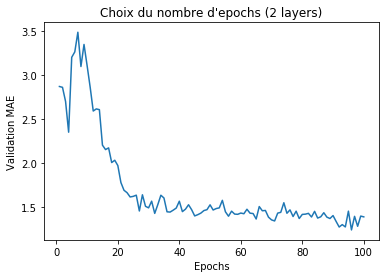

In [252]:
# Affichage de la MAE en fonction du nombre d'epochs
plt.plot(range(1,len(mean_mae_hist)+1), mean_mae_hist)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.title("Choix du nombre d'epochs (2 layers)")
plt.show()

## Etape 6 : Résultats

In [253]:
# Tri d'une liste, sauvegarde de l'ordre
# In  : liste   list, la liste à trier
# Out : la liste triée et l'ordre
def tri(liste):
    triee = []
    ordre = []
    aux = liste.copy()
    for i in range(len(liste)):
        mini = min(aux)
        triee.append(mini)
        ordre.append(liste.index(mini))
        aux.remove(mini)
    return triee, ordre

In [254]:
# Tri des sorties selon l'odre des x
# In  : liste    list,  la liste des sorties
#       ordre    list,  l'ordre du tri
# Out : la liste triée
def tri_y(liste,ordre):
    triee = []
    for i in ordre:
        triee.append(liste[i])
    return triee

In [255]:
# Génération des données pour le train
x_train, y_train = choix1(1000)

In [256]:
# Génération des données pour le test
x_test, y_test = choix2(1000)

In [264]:
# Construction du modèle
model_res = build_model_2l(64)
model_res.fit(x_train,y_train,epochs = 92, batch_size = 16, verbose = 0)

In [265]:
# Prédiction du résultat sur le jeu de test
y_predict = model_res.predict(x_test)
x_test_tri, ordre_tri = tri(x_test)
y_test_tri = tri_y(y_test,ordre_tri)
y_predict_tri = tri_y(y_predict,ordre_tri)

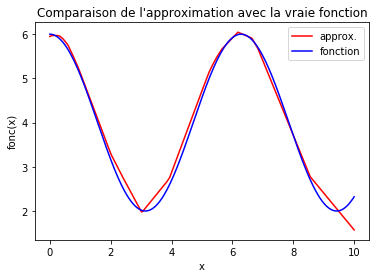

In [266]:
# Affichage du résultat
plt.plot(x_test_tri,y_predict_tri, color = 'r')
plt.plot(x_test_tri,fonc(x_test_tri), color = 'b')
plt.legend(['approx.', 'fonction'])
plt.xlabel('x')
plt.ylabel('fonc(x)')
plt.title("Comparaison de l'approximation avec la vraie fonction")
plt.show()

## Bonus : résultats avec un réseaux plus gros et plus de données

In [271]:
# Génération des données pour le test
x_bonus, y_bonus =  choix2(10000)

In [272]:
# Construction du modèle
model_bonus = build_model_4l(512)
model_bonus.fit(x_bonus,y_bonus,epochs = 200, batch_size = 16, verbose = 0)

In [273]:
# Prédiction du résultat sur le jeu de test
y_predict_bonus = model_bonus.predict(x_bonus)
x_bonus_tri, ordre_bonus_tri = tri(x_bonus)
y_bonus_tri = tri_y(y_bonus,ordre_bonus_tri)
y_predict_bonus_tri = tri_y(y_predict_bonus,ordre_bonus_tri)

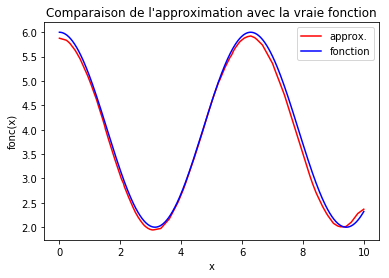

In [275]:
# Affichage du résultat
plt.plot(x_bonus_tri,y_predict_bonus_tri,color = 'r')
plt.plot(x_bonus_tri,fonc(x_bonus_tri),color = 'b')
plt.legend(['approx.', 'fonction'])
plt.xlabel('x')
plt.ylabel('fonc(x)')
plt.title("Comparaison de l'approximation avec la vraie fonction")
plt.show()